<a href="https://www.kaggle.com/code/rubanzasilva/eda-fast-ai-neural-nets-gradient-boosting?scriptVersionId=255241228" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Binary Classification on a Bank Dataset 

In this competition, we are tasked with predicting whether a client will subscribe to a term deposit.

Per Investopedia, a [bank term deposit](https://www.investopedia.com/terms/t/termdeposit.asp) is a bank savings product where funds are committed to a financial institution for a certain duration. Here, you agree to deposit a specific amount of money for a predetermined period of time in exchange for a guaranteed interest rate.

This interest rate is usually higher than that given on a regular savings account because you are giving up liquidity. The trade-off is simple: you sacrifice immediate access to your money in exchange for higher, guaranteed returns. Banks can offer better rates because they know exactly how long they'll have your funds to lend out to other customers.

## Library & Data Import

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s5e8/sample_submission.csv
/kaggle/input/playground-series-s5e8/train.csv
/kaggle/input/playground-series-s5e8/test.csv


In [2]:
%%time
%pip install catboost
%pip install optuna
#%pip install optuna_distributed
#%pip install openfe
%pip install seaborn
%pip install xgboost
%pip install lightgbm
%pip install fastkaggle
#%pip install h2o
%pip install -Uqq fastbook
#%pip install polars
%pip install -q -U autogluon.tabular
%pip install autogluon
%pip install --upgrade pip
%pip install tqdm
#%pip install wandb
#%pip install sweetviz

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 17.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.1/124.1 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 17.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 246.9/246.9 kB 22.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

The latest version of AutoGluon appears to have a compatibility issue with the latest versions of NumPy, so for now, I will downgrade NumPy to a known working version.

In [3]:
#%pip install -U autogluon > /dev/null
# In your terminal/command prompt
#pip install numpy==1.24.3
# or
%pip install numpy==1.23.5

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 102.5 MB/s  0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 2.8.0 requires google-cloud-bigquery-storage<3.0.0,>=2.30.0, which is not installed.
autogluon-core 1.4.0 requires numpy<2.4.0,>=1.25.0, but you have numpy 1.23.5 which is incompatible.
autogluon-tabular 1.4.0 requires numpy<2.4.0,>=1.25.0, but you have numpy 1.23.5 which is incompatible.
autogluon-multimodal 1.4.0 requires numpy<2.4.0,>=1.25.0, but you have numpy 1.23.5 which is incompatible.
autogluon-common 1.4.0 requires numpy<2.4.0,>=1.25.0, but you have numpy 1.23.5 which is incompatible.
autogluon-features 1.4.0 requires numpy<2.4.0,>=1.25.0, but you have numpy 1.23.5 which is

In [4]:
# Update to compatible versions
!pip install autogluon==1.1.1 xgboost==2.0.3
# Restart kernel after installation

  Using cached packaging-24.2-py3-none-any.whl.metadata (3.2 kB)
INFO: pip is looking at multiple versions of thinc to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of google-api-core to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 42.6 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 85.5 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 808.5/808.5 kB 38.8 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 119.8 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 812.3/812.3 kB 36.7 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.6/65.6 MB 51.5 MB/s  0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 47.9 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 130.2 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from numpy import random
from tqdm import tqdm

#import fastbook
#fastbook.setup_book()
#from fastbook import *
from fastai.tabular.all import *
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from numpy import random
from tqdm import tqdm
from ipywidgets import interact

from fastai.imports import *
np.set_printoptions(linewidth=130)


from sklearn.ensemble import RandomForestClassifier
#from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import VotingClassifier,StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold,StratifiedKFold, cross_val_score,train_test_split,GridSearchCV


from pathlib import Path
import os

import xgboost as xgb
from xgboost import plot_importance
from xgboost import XGBClassifier

import lightgbm as lgb
from lightgbm import LGBMClassifier

from catboost import CatBoostClassifier,CatBoostRegressor,Pool, metrics, cv


import warnings


#from openfe import OpenFE, transform
from autogluon.tabular import TabularDataset, TabularPredictor

#import h2o
#from h2o.automl import H2OAutoML

import gc

import optuna
from optuna.samplers import TPESampler

import pickle
from joblib import dump, load
#import sweetviz as sv
#from IPython.display import FileLink

#import h2o
#from h2o.automl import H2OAutoML

In [6]:
path = Path('/kaggle/input/playground-series-s5e8/')
path

Path('/kaggle/input/playground-series-s5e8')

In [7]:
train_df = pd.read_csv(path/'train.csv',index_col='id')
test_df = pd.read_csv(path/'test.csv',index_col='id')
sub_df = pd.read_csv(path/'sample_submission.csv')

In [8]:
train_df.shape

(750000, 17)

## Exploratory Data Analysis

In [9]:
train_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
id,,,,,,,,,,,,,,,,,
0,42,technician,married,secondary,no,7,no,no,cellular,25,aug,117,3,-1,0,unknown,0
1,38,blue-collar,married,secondary,no,514,no,no,unknown,18,jun,185,1,-1,0,unknown,0
2,36,blue-collar,married,secondary,no,602,yes,no,unknown,14,may,111,2,-1,0,unknown,0
3,27,student,single,secondary,no,34,yes,no,unknown,28,may,10,2,-1,0,unknown,0
4,26,technician,married,secondary,no,889,yes,no,cellular,3,feb,902,1,-1,0,unknown,1


In [10]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 750000 entries, 0 to 749999
Data columns (total 17 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   age        750000 non-null  int64 
 1   job        750000 non-null  object
 2   marital    750000 non-null  object
 3   education  750000 non-null  object
 4   default    750000 non-null  object
 5   balance    750000 non-null  int64 
 6   housing    750000 non-null  object
 7   loan       750000 non-null  object
 8   contact    750000 non-null  object
 9   day        750000 non-null  int64 
 10  month      750000 non-null  object
 11  duration   750000 non-null  int64 
 12  campaign   750000 non-null  int64 
 13  pdays      750000 non-null  int64 
 14  previous   750000 non-null  int64 
 15  poutcome   750000 non-null  object
 16  y          750000 non-null  int64 
dtypes: int64(8), object(9)
memory usage: 103.0+ MB


In [11]:
train_df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [12]:
missing_values_count = train_df.isnull().sum()
sorted_missing_values = missing_values_count.sort_values(ascending=False)
print(sorted_missing_values)

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [13]:
#Missing values returned as percentages.
missing_percentages = train_df.isnull().mean() * 100
sorted_missing_percentages = missing_percentages.sort_values(ascending=False)
print(sorted_missing_percentages)

age          0.0
job          0.0
marital      0.0
education    0.0
default      0.0
balance      0.0
housing      0.0
loan         0.0
contact      0.0
day          0.0
month        0.0
duration     0.0
campaign     0.0
pdays        0.0
previous     0.0
poutcome     0.0
y            0.0
dtype: float64


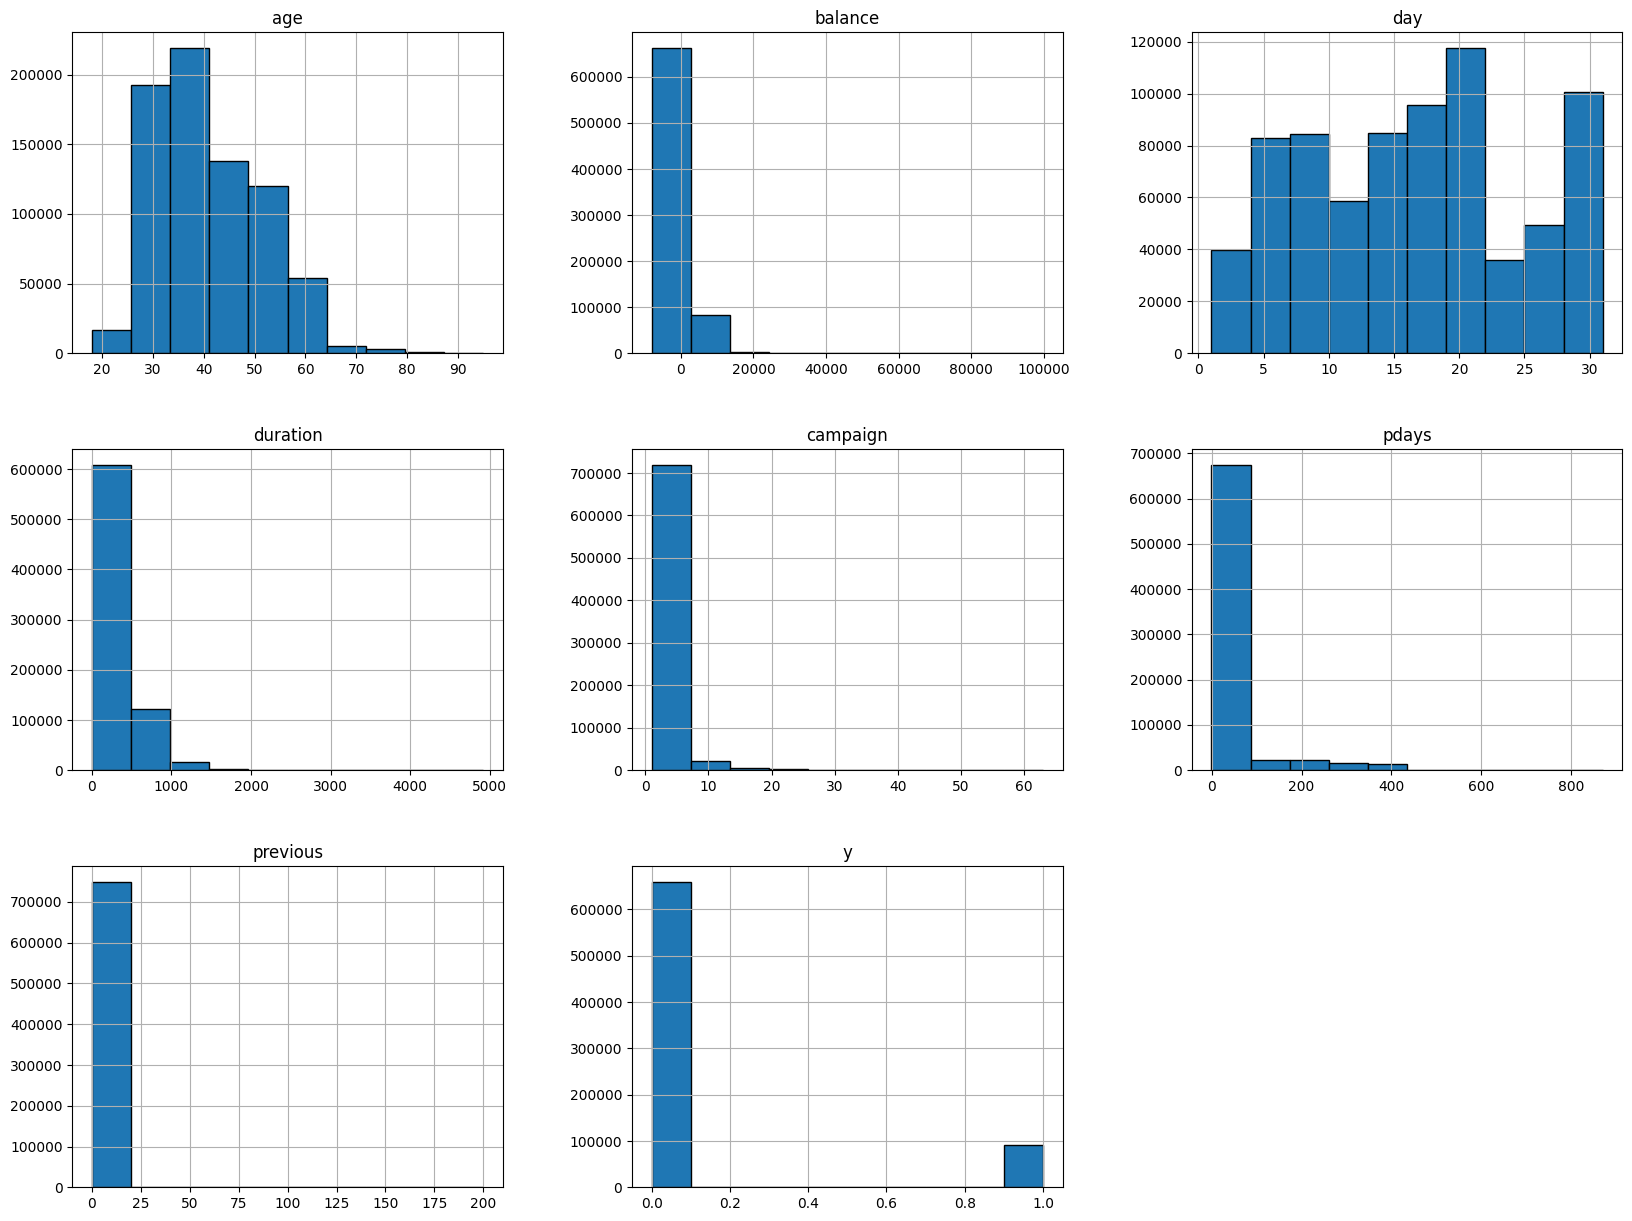

In [14]:
train_df.hist(figsize=(20,15),edgecolor='black');

In [15]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,750000.0,40.926395,10.098829,18.0,33.0,39.0,48.0,95.0
balance,750000.0,1204.067397,2836.096759,-8019.0,0.0,634.0,1390.0,99717.0
day,750000.0,16.117209,8.250832,1.0,9.0,17.0,21.0,31.0
duration,750000.0,256.229144,272.555662,1.0,91.0,133.0,361.0,4918.0
campaign,750000.0,2.577008,2.718514,1.0,1.0,2.0,3.0,63.0
pdays,750000.0,22.412733,77.319998,-1.0,-1.0,-1.0,-1.0,871.0
previous,750000.0,0.298545,1.335926,0.0,0.0,0.0,0.0,200.0
y,750000.0,0.120651,0.325721,0.0,0.0,0.0,0.0,1.0


## Prepare Data for training

In [16]:
splits = RandomSplitter(valid_pct=0.2)(range_of(train_df))

In [17]:
#train_df = pd.concat([train_df, original_df], ignore_index=True)

In [18]:
cont_names,cat_names = cont_cat_split(train_df, dep_var='y')
#splits = RandomSplitter(valid_pct=0.2)(range_of(train_df))
to = TabularPandas(train_df, procs=[Categorify, FillMissing,Normalize],
#to = TabularPandas(train_df, procs=[Categorify,Normalize],
                   cat_names = cat_names,
                   cont_names = cont_names,
                   y_names='y',
                   y_block=CategoryBlock(),
                   splits=splits)
dls = to.dataloaders(bs=64)
#dls = to.dataloaders(bs=1024)
test_dl = dls.test_dl(test_df)

X_train, y_train = to.train.xs, to.train.ys.values.ravel()
X_test, y_test = to.valid.xs, to.valid.ys.values.ravel()

In [19]:
cont_names,len(cont_names)

(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], 7)

In [20]:
cat_names, len(cat_names)

(['job',
  'marital',
  'education',
  'default',
  'housing',
  'loan',
  'contact',
  'month',
  'poutcome'],
 9)

In [21]:
X_train

,job,marital,education,default,housing,loan,contact,month,poutcome,age,balance,day,duration,campaign,pdays,previous
id,,,,,,,,,,,,,,,,
556446,2,2,2,1,2,1,1,1,4,-0.685523,-0.289426,0.469838,1.216527,0.522297,-0.303111,-0.227129
1423,8,2,2,1,1,1,2,10,4,0.107459,20.197722,0.227488,-0.804019,-0.580719,-0.303111,-0.227129
706164,8,1,2,1,2,1,3,7,4,-0.982891,-0.444766,-1.468963,-0.639001,-0.213047,-0.303111,-0.227129
657466,5,2,3,1,2,1,1,10,4,0.107459,-0.227784,0.106313,-0.613332,-0.580719,-0.303111,-0.227129
226263,5,2,3,1,1,1,1,2,4,0.305704,0.102268,-1.105437,1.227528,1.625314,-0.303111,-0.227129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
697442,2,3,2,1,2,1,3,9,4,0.900441,-0.423983,-1.105437,-0.400643,-0.580719,-0.303111,-0.227129
94656,10,3,2,1,2,1,1,9,4,0.603073,0.059294,-0.620737,-0.646335,0.522297,-0.303111,-0.227129
673475,10,2,3,1,2,1,1,10,4,-0.784646,-0.494080,0.348663,-0.473984,0.154625,-0.303111,-0.227129


Below we define a function to help us do stratified kfold cross validation which we use below

In [22]:
def cross_val_predict(model, X_train, y_train, X_test, n_splits=5, random_state=42, 
                       return_proba=True, scoring='roc_auc', verbose=True):
    """
    Generic cross-validation function that works with ANY sklearn-compatible model.
    
    Parameters:
    - model: INSTANTIATED model object (e.g., xgb.XGBClassifier(n_estimators=100))
    - X_train, y_train: training data and labels
    - X_test: test data for final predictions
    - n_splits: number of CV folds
    - random_state: random seed for reproducibility
    - return_proba: if True, return probabilities; if False, return class predictions
    - scoring: metric to use ('roc_auc', 'accuracy')
    - verbose: print progress
    
    Returns:
    - oof_predictions: out-of-fold predictions on training set
    - test_predictions: predictions on test set (averaged across folds)
    - mean_score: mean score across folds
    - fold_scores: list of scores for each fold
    """
    from sklearn.model_selection import StratifiedKFold
    from sklearn.metrics import accuracy_score, roc_auc_score
    from sklearn.base import clone
    import numpy as np
    
    # Initialize stratified k-fold
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_state)
    
    # Initialize arrays to store results
    if return_proba:
        oof_predictions = np.zeros(len(X_train))
        test_predictions = np.zeros(len(X_test))
    else:
        oof_predictions = np.zeros(len(X_train), dtype=int)
        test_predictions = np.zeros(len(X_test))
    
    fold_scores = []
    
    # Perform cross-validation
    for fold, (train_index, val_index) in enumerate(skf.split(X_train, y_train), 1):
        if verbose:
            print(f"Training fold {fold}/{n_splits}...")
        
        # Split data for current fold
        X_fold_train, X_fold_val = X_train.iloc[train_index], X_train.iloc[val_index]
        y_fold_train, y_fold_val = y_train[train_index], y_train[val_index]
        
        # Clone the model to avoid interference between folds
        model_fold = clone(model)
        
        # Train model on current fold
        model_fold.fit(X_fold_train, y_fold_train)
        
        # Get predictions based on return_proba setting
        if return_proba:
            # Get probabilities for positive class
            y_pred_proba = model_fold.predict_proba(X_fold_val)[:, 1]
            oof_predictions[val_index] = y_pred_proba
            test_predictions += model_fold.predict_proba(X_test)[:, 1] / n_splits
            
            # Calculate score
            if scoring == 'roc_auc':
                cv_score = roc_auc_score(y_fold_val, y_pred_proba)
            else:  # accuracy
                y_pred_fold = (y_pred_proba > 0.5).astype(int)
                cv_score = accuracy_score(y_fold_val, y_pred_fold)
        else:
            # Get class predictions
            y_pred_fold = model_fold.predict(X_fold_val)
            oof_predictions[val_index] = y_pred_fold
            test_predictions += model_fold.predict(X_test) / n_splits
            cv_score = accuracy_score(y_fold_val, y_pred_fold)
        
        fold_scores.append(cv_score)
        if verbose:
            print(f"Fold {fold} {scoring}: {cv_score:.6f}")
    
    # Round test predictions if using hard predictions
    if not return_proba:
        test_predictions = np.round(test_predictions).astype(int)
    
    # Calculate mean score
    mean_score = np.mean(fold_scores)
    if verbose:
        print(f"\nMean {scoring}: {mean_score:.6f}")
    
    return oof_predictions, test_predictions, mean_score, fold_scores


# =============================================================================
# USAGE EXAMPLES WITH DIFFERENT MODELS
# =============================================================================

# Example: CatBoost (if installed)
"""
cat_model = CatBoostClassifier(
    iterations=100,
    depth=6,
    learning_rate=0.1,
    random_state=42,
    verbose=False
)

cat_oof, cat_test, cat_auc, cat_scores = cross_val_predict(
    model=cat_model,
    X_train=X_train,
    y_train=y_train, 
    X_test=X_test,
    return_proba=True,
    scoring='roc_auc'
)
"""

# =============================================================================
# ENSEMBLE ALL MODELS
# =============================================================================
"""
print("Individual Model Performance:")
print(f"XGBoost AUC: {xgb_auc:.6f}")
print(f"Random Forest AUC: {rf_auc:.6f}")
print(f"LightGBM AUC: {lgb_auc:.6f}")

# Simple ensemble
ensemble_oof = (xgb_oof + rf_oof + lgb_oof) / 3
ensemble_test = (xgb_test + rf_test + lgb_test) / 3

ensemble_auc = roc_auc_score(y_train, ensemble_oof)
print(f"\nEnsemble AUC: {ensemble_auc:.6f}")

# Create submission
submission = pd.DataFrame({
    'id': test_df.index,
    'Depression': ensemble_test
})
submission.to_csv('ensemble_submission.csv', index=False)

print(f"\nShapes:")
print(f"OOF predictions: {ensemble_oof.shape} (training data)")
print(f"Test predictions: {ensemble_test.shape} (test data)")
print("Different shapes = different datasets!")
"""

'\nprint("Individual Model Performance:")\nprint(f"XGBoost AUC: {xgb_auc:.6f}")\nprint(f"Random Forest AUC: {rf_auc:.6f}")\nprint(f"LightGBM AUC: {lgb_auc:.6f}")\n\n# Simple ensemble\nensemble_oof = (xgb_oof + rf_oof + lgb_oof) / 3\nensemble_test = (xgb_test + rf_test + lgb_test) / 3\n\nensemble_auc = roc_auc_score(y_train, ensemble_oof)\nprint(f"\nEnsemble AUC: {ensemble_auc:.6f}")\n\n# Create submission\nsubmission = pd.DataFrame({\n    \'id\': test_df.index,\n    \'Depression\': ensemble_test\n})\nsubmission.to_csv(\'ensemble_submission.csv\', index=False)\n\nprint(f"\nShapes:")\nprint(f"OOF predictions: {ensemble_oof.shape} (training data)")\nprint(f"Test predictions: {ensemble_test.shape} (test data)")\nprint("Different shapes = different datasets!")\n'

## Neural Networks

In [23]:
learn = tabular_learner(dls, metrics=RocAucBinary())

SuggestedLRs(slide=0.019054606556892395, valley=0.0020892962347716093)

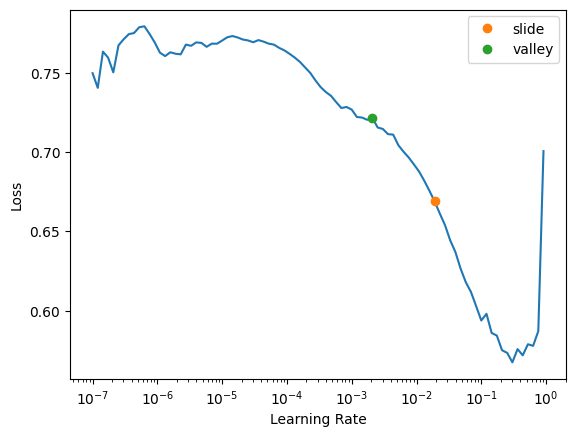

In [24]:
#learn.lr_find()
learn.lr_find(suggest_funcs=(slide,valley))

In [25]:
%%time
learn.fit_one_cycle(2, 1.089e-3)

epoch,train_loss,valid_loss,roc_auc_score,time
0,0.184848,0.165221,0.958598,01:26
1,0.160724,0.159505,0.960407,01:26


CPU times: user 2min 50s, sys: 1.34 s, total: 2min 51s
Wall time: 2min 52s


In [26]:
dl = test_dl

In [27]:
learn.save('nn_pnality_tp_pd')

Path('models/nn_pnality_tp_pd.pth')

In [28]:
nn_preds = learn.get_preds(dl=dl)
nn_preds_x = learn.get_preds()[0]
a_preds, _ = learn.get_preds(dl=dl)
nn_preds_y = a_preds.squeeze(1)
nn_preds_proba = (a_preds[:, 1])

In [29]:
a_preds.shape

torch.Size([250000, 2])

In [30]:
nn_preds_y.shape,sub_df.shape

(torch.Size([250000, 2]), (250000, 2))

In [31]:
nn_preds_x

tensor([[9.9006e-01, 9.9439e-03],
        [9.9777e-01, 2.2277e-03],
        [9.9926e-01, 7.3782e-04],
        ...,
        [9.9961e-01, 3.8715e-04],
        [9.5456e-01, 4.5439e-02],
        [9.9983e-01, 1.6830e-04]])

In [32]:
nn_preds_y

tensor([[9.9344e-01, 6.5575e-03],
        [6.1344e-01, 3.8656e-01],
        [9.9981e-01, 1.8830e-04],
        ...,
        [1.7956e-01, 8.2044e-01],
        [9.9717e-01, 2.8285e-03],
        [7.6225e-01, 2.3775e-01]])

In [33]:
a_preds

tensor([[9.9344e-01, 6.5575e-03],
        [6.1344e-01, 3.8656e-01],
        [9.9981e-01, 1.8830e-04],
        ...,
        [1.7956e-01, 8.2044e-01],
        [9.9717e-01, 2.8285e-03],
        [7.6225e-01, 2.3775e-01]])

In [34]:
nn_preds_proba

tensor([6.5575e-03, 3.8656e-01, 1.8830e-04,  ..., 8.2044e-01, 2.8285e-03,
        2.3775e-01])

In [35]:
#final_preds = torch.round(a_preds).long()
final_preds = a_preds[:,1]
final_preds

tensor([6.5575e-03, 3.8656e-01, 1.8830e-04,  ..., 8.2044e-01, 2.8285e-03,
        2.3775e-01])

In [36]:
final_preds.shape

torch.Size([250000])

In [37]:
!rm submission.csv
sub_df['y'] = final_preds
sub_df.to_csv('submission.csv', index=False)
sub = pd.read_csv('submission.csv', index_col='id')
sub

rm: cannot remove 'submission.csv': No such file or directory


,y
id,
750000,0.006558
750001,0.386559
750002,0.000188
750003,0.000136
750004,0.020889
...,...
999995,0.000063
999996,0.096140
999997,0.820443


## Decision Trees

### Random Forests

In [38]:
%%time
rf = RandomForestClassifier(100, min_samples_leaf=3)
rf_model = rf.fit(X_train, y_train);

rf_preds = tensor(rf_model.predict(test_dl.xs))
rf_preds_probs = tensor(rf_model.predict_proba(test_dl.xs))[:, 1]

rf_preds_x = tensor(rf_model.predict(X_test))
rf_preds_proba = tensor(rf_model.predict_proba(X_test))[:, 1]

#mse = mean_absolute_error(y_test, rf_preds_x)
#rmse = np.sqrt(mse)

#accuracy_score(y_test,rf_preds_x)
rf_score = roc_auc_score(y_test,rf_preds_proba)
rf_score

CPU times: user 2min 6s, sys: 256 ms, total: 2min 7s
Wall time: 2min 6s


0.9643156588679553

In [39]:
rf_preds_probs,rf_preds_probs.shape

(tensor([5.2844e-04, 1.8866e-01, 9.5000e-03,  ..., 6.8981e-01, 3.5512e-05,
         8.2458e-02]),
 torch.Size([250000]))

In [40]:
rf_preds_probs 

tensor([5.2844e-04, 1.8866e-01, 9.5000e-03,  ..., 6.8981e-01, 3.5512e-05,
        8.2458e-02])

In [41]:
def rf_feat_importance(m, train_subset):
    return pd.DataFrame({'cols':train_subset.columns, 'imp':m.feature_importances_}
                       ).sort_values('imp', ascending=False)

In [42]:
fi = rf_feat_importance(rf_model, X_train)
#fi[:10]

fi

,cols,imp
12,duration,0.463455
10,balance,0.097763
7,month,0.068721
9,age,0.068397
11,day,0.056950
8,poutcome,0.043749
4,housing,0.035950
14,pdays,0.034337
6,contact,0.029857
0,job,0.026219


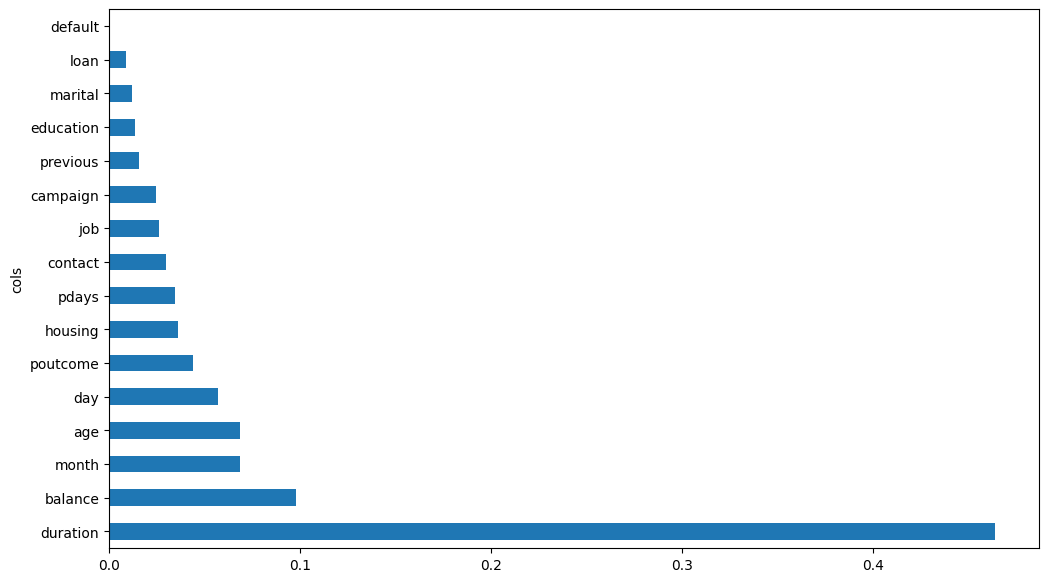

In [43]:
def plot_fi(fi):
    return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)

#plot_fi(fi[:30]);
plot_fi(fi);

#### Cross validation - RF

In [44]:
rf = RandomForestClassifier(100, min_samples_leaf=3)
rf

RandomForestClassifier(min_samples_leaf=3)

In [45]:
rf_oof_predictions, rf_test_predictions, rf_mean_score, rf_fold_scores = cross_val_predict(
    model=rf, X_train=X_train, y_train=y_train, X_test=X_test, 
)

Training fold 1/5...
Fold 1 roc_auc: 0.962948
Training fold 2/5...
Fold 2 roc_auc: 0.963390
Training fold 3/5...
Fold 3 roc_auc: 0.964270
Training fold 4/5...
Fold 4 roc_auc: 0.963433
Training fold 5/5...
Fold 5 roc_auc: 0.962903

Mean roc_auc: 0.963389


In [46]:
rf_oof_predictions.shape, rf_test_predictions.shape

((600000,), (150000,))

In [47]:
rf_oof_predictions

array([8.48916532e-02, 1.15296554e-02, 0.00000000e+00, ..., 8.28203417e-05, 9.65119048e-01, 1.22631591e-01])

In [48]:
rf_test_predictions

array([4.42667788e-03, 1.62469993e-03, 9.47778038e-04, ..., 7.40740741e-05, 8.28434457e-02, 2.77777778e-03])

In [49]:
rf_mean_score, rf_fold_scores

(0.963388667532108,
 [0.9629481362653243,
  0.9633895392734373,
  0.9642696909149199,
  0.9634327651718042,
  0.9629032060350542])

In [50]:
!rm submission.csv
sub_df['y'] = rf_preds_probs
sub_df.to_csv('submission.csv', index=False)
sub = pd.read_csv('submission.csv', index_col='id')
sub

,y
id,
750000,0.000528
750001,0.188665
750002,0.009500
750003,0.001429
750004,0.053433
...,...
999995,0.000847
999996,0.138684
999997,0.689809


## Gradient Boosting

### XGBoost

In [51]:
%%time
xgb_model = xgb.XGBClassifier()
xgb_model = xgb_model.fit(X_train, y_train)

xgb_preds = tensor(xgb_model.predict(test_dl.xs))
xgb_preds_proba = tensor(xgb_model.predict_proba(test_dl.xs))[:, 1]

xgb_preds_x = tensor(xgb_model.predict(X_test))
xgb_preds_x_proba = tensor(xgb_model.predict_proba(X_test))[:, 1]

xgb_score = roc_auc_score(y_test,xgb_preds_x_proba)
xgb_score

CPU times: user 8.03 s, sys: 73 ms, total: 8.1 s
Wall time: 4.26 s


0.9664771982897294

In [52]:
xgb_preds_proba

tensor([1.7188e-03, 7.6756e-02, 3.0070e-04,  ..., 8.2154e-01, 5.5432e-04,
        1.2182e-01])

#### XGB Feature Importance

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

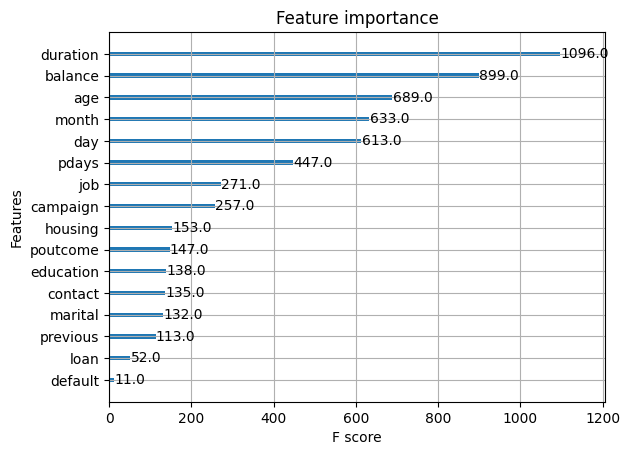

In [53]:
#plot_importance(xgb_model.fit(X_train, y_train))
plot_importance(xgb_model)

#### Cross Validation - XGBoost

In [54]:
xgb_model = xgb.XGBClassifier()
xgb_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [55]:
xgb_oof_predictions, xgb_test_predictions, xgb_mean_score, xgb_fold_scores = cross_val_predict(
    model=xgb_model, X_train=X_train, y_train=y_train, X_test=X_test, 
)

Training fold 1/5...
Fold 1 roc_auc: 0.965677
Training fold 2/5...
Fold 2 roc_auc: 0.965698
Training fold 3/5...
Fold 3 roc_auc: 0.966885
Training fold 4/5...
Fold 4 roc_auc: 0.966077
Training fold 5/5...
Fold 5 roc_auc: 0.965277

Mean roc_auc: 0.965923


In [56]:
xgb_oof_predictions

array([1.06467843e-01, 6.52285758e-03, 1.20951903e-04, ..., 5.66362927e-04, 9.67929661e-01, 3.10812071e-02])

In [57]:
xgb_test_predictions

array([0.01536484, 0.00095714, 0.0001887 , ..., 0.00018861, 0.06075166, 0.00142124])

In [58]:
xgb_mean_score

0.9659227624250768

In [59]:
 xgb_fold_scores

[0.9656774681824176,
 0.9656976160032953,
 0.9668846925295006,
 0.966077412198243,
 0.9652766232119281]

In [60]:
!rm submission.csv
sub_df['y'] = xgb_preds_proba
sub_df.to_csv('submission.csv', index=False)
sub = pd.read_csv('submission.csv', index_col='id')
sub

,y
id,
750000,0.001719
750001,0.076756
750002,0.000301
750003,0.000188
750004,0.024447
...,...
999995,0.000179
999996,0.133984
999997,0.821538


### LGBM

In [61]:
%%time
#ds subset
lgbm_model = lgb.LGBMClassifier()
lgbm_model = lgbm_model.fit(X_train, y_train)

#test set preds
lgbm_preds = tensor(lgbm_model.predict(test_dl.xs))
lgbm_preds_prob = tensor(lgbm_model.predict_proba(test_dl.xs))
lgbm_preds_proba = (lgbm_preds_prob[:, 1])

#validation set preds
lgbm_preds_x = tensor(lgbm_model.predict(X_test))
lgbm_preds_x_prob = tensor(lgbm_model.predict_proba(X_test))
lgbm_positive_preds_x = (lgbm_preds_x_prob[:, 1])

lgbm_score = roc_auc_score(y_test,lgbm_positive_preds_x)
lgbm_score

#lgb_preds_x_prob = tensor(lgb_model.predict_proba(X_test))

lgbm_score = roc_auc_score(y_test,lgbm_positive_preds_x)
lgbm_score

[LightGBM] [Info] Number of positive: 72409, number of negative: 527591
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.029134 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1008
[LightGBM] [Info] Number of data points in the train set: 600000, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.120682 -> initscore=-1.985991
[LightGBM] [Info] Start training from score -1.985991
CPU times: user 12.3 s, sys: 67.9 ms, total: 12.3 s
Wall time: 6.33 s


0.9651269746732077

In [62]:
lgbm_preds_prob,lgbm_preds_prob.shape

(tensor([[0.9974, 0.0026],
         [0.9006, 0.0994],
         [0.9988, 0.0012],
         ...,
         [0.2555, 0.7445],
         [0.9989, 0.0011],
         [0.8912, 0.1088]]),
 torch.Size([250000, 2]))

#### LGBM Feature Importance

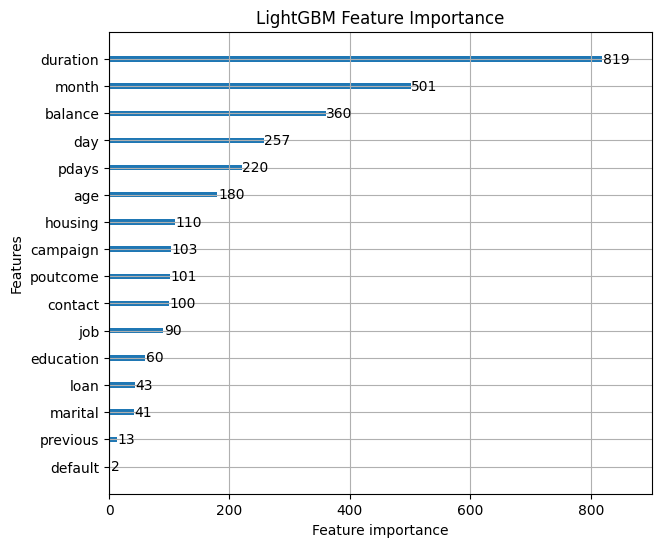

In [63]:
# Plot feature importance without using Gain or split
lgb.plot_importance(lgbm_model, figsize=(7,6), title="LightGBM Feature Importance")
#plt.title('LGBM Feature Importance')
#plt.tight_layout()
plt.show()

#### Cross Validation - LGBM

In [64]:
lgbm_model = lgb.LGBMClassifier()
lgbm_model

LGBMClassifier()

In [65]:
lgbm_oof_predictions, lgbm_test_predictions, lgbm_mean_score, lgbm_fold_scores = cross_val_predict(
    model=lgbm_model, X_train=X_train, y_train=y_train, X_test=X_test,
)

Training fold 1/5...
[LightGBM] [Info] Number of positive: 57928, number of negative: 422072
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020948 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1006
[LightGBM] [Info] Number of data points in the train set: 480000, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.120683 -> initscore=-1.985975
[LightGBM] [Info] Start training from score -1.985975
Fold 1 roc_auc: 0.964653
Training fold 2/5...
[LightGBM] [Info] Number of positive: 57927, number of negative: 422073
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020831 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1008
[LightGBM] [Info] Number of data points i

In [66]:
lgbm_oof_predictions

array([8.82456731e-02, 4.92796214e-03, 4.65451275e-04, ..., 1.53910396e-03, 9.63066018e-01, 1.51939659e-01])

In [67]:
lgbm_test_predictions

array([0.01189123, 0.00119073, 0.00059543, ..., 0.000582  , 0.06322301, 0.00185023])

In [68]:
 lgbm_mean_score

0.9646916132962545

In [69]:
lgbm_fold_scores

[0.9646526842495091,
 0.9638361172367613,
 0.9655724520489823,
 0.964683285686772,
 0.9647135272592472]

In [70]:
!rm submission.csv
sub_df['y'] = lgbm_preds_proba
sub_df.to_csv('submission.csv', index=False)
sub = pd.read_csv('submission.csv', index_col='id')
sub

,y
id,
750000,0.002648
750001,0.099366
750002,0.001194
750003,0.000532
750004,0.025917
...,...
999995,0.000514
999996,0.124634
999997,0.744518


### CatBoost

In [71]:
%%time
#using full ds
cat_model = CatBoostClassifier()
cat_model = cat_model.fit(X_train, y_train, eval_set=(X_test, y_test), verbose=False)

#test set preds
cat_preds = tensor(cat_model.predict(test_dl.xs))
cat_preds_probs = tensor(cat_model.predict_proba(test_dl.xs))[:, 1]
#cat_preds_final = cat_preds.squeeze(1)

#validation set preds
cat_preds_x = tensor(cat_model.predict(X_test))
cat_preds_x_proba = tensor(cat_model.predict_proba(X_test))[:, 1]

#cat_preds_x_final = cat_preds_x.squeeze(1)

#accuracy_score(y_test,cat_preds_x)

cat_score = roc_auc_score(y_test,cat_preds_x_proba)
cat_score

CPU times: user 3min 50s, sys: 9.64 s, total: 4min
Wall time: 1min 2s


0.9674945271137027

#### CatBoost Feature Importance

In [72]:
feature_importance_default = cat_model.get_feature_importance()
feature_names = X_train.columns

# Create DataFrame for better visualization
importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': feature_importance_default
}).sort_values('importance', ascending=False)

print("=== Default Feature Importance (PredictionValuesChange) ===")
print(importance_df.head(10))

=== Default Feature Importance (PredictionValuesChange) ===
     feature  importance
12  duration   47.451712
7      month    9.537093
6    contact    9.321267
10   balance    8.040118
4    housing    5.571977
11       day    4.047657
9        age    2.530321
13  campaign    2.524798
14     pdays    2.516220
8   poutcome    2.316209


#### Cross validation - CatBoost

In [73]:
cat_model = CatBoostClassifier()
cat_model

In [74]:
cat_oof_predictions, cat_test_predictions, cat_mean_score, cat_fold_scores = cross_val_predict(
    model=cat_model, X_train=X_train, y_train=y_train, X_test=X_test, 
)

Training fold 1/5...
Learning rate set to 0.143822
0:	learn: 0.4840128	total: 52ms	remaining: 51.9s
1:	learn: 0.3636541	total: 100ms	remaining: 49.9s
2:	learn: 0.2983499	total: 148ms	remaining: 49.1s
3:	learn: 0.2613356	total: 197ms	remaining: 49.1s
4:	learn: 0.2385232	total: 247ms	remaining: 49.1s
5:	learn: 0.2252654	total: 293ms	remaining: 48.5s
6:	learn: 0.2154676	total: 340ms	remaining: 48.3s
7:	learn: 0.2086349	total: 388ms	remaining: 48.1s
8:	learn: 0.2035821	total: 437ms	remaining: 48.2s
9:	learn: 0.1997746	total: 484ms	remaining: 47.9s
10:	learn: 0.1968034	total: 533ms	remaining: 47.9s
11:	learn: 0.1942881	total: 580ms	remaining: 47.7s
12:	learn: 0.1927150	total: 626ms	remaining: 47.5s
13:	learn: 0.1905070	total: 675ms	remaining: 47.5s
14:	learn: 0.1893030	total: 719ms	remaining: 47.2s
15:	learn: 0.1875250	total: 767ms	remaining: 47.2s
16:	learn: 0.1862658	total: 811ms	remaining: 46.9s
17:	learn: 0.1842383	total: 861ms	remaining: 46.9s
18:	learn: 0.1832396	total: 907ms	remainin

## Ensembling

### Averaging

#### CatBoost + XGBoost

In [75]:
cat_xgb_preds = (xgb_preds_proba + cat_preds_probs)/ 2
cat_xgb_preds 

tensor([2.6387e-03, 7.3250e-02, 2.4443e-04,  ..., 6.8145e-01, 9.2565e-04,
        1.2915e-01])

In [76]:
cat_xgb_x_preds = (xgb_preds_x_proba + cat_preds_x_proba)/ 2
cat_xgb_x_preds 

tensor([0.0154, 0.0016, 0.0002,  ..., 0.0002, 0.0680, 0.0004])

In [77]:
cat_xgb_score = roc_auc_score(y_test,cat_xgb_x_preds)
cat_xgb_score

0.967698974933104

#### CatBoost + LGBM

In [78]:
cat_lgbm_preds = (lgbm_preds_proba + cat_preds_probs)/ 2
cat_lgbm_preds 

tensor([0.0031, 0.0846, 0.0007,  ..., 0.6429, 0.0012, 0.1226])

In [79]:
cat_lgbm_x_preds = (lgbm_positive_preds_x + cat_preds_x_proba)/ 2
cat_lgbm_x_preds.shape

torch.Size([150000])

In [80]:
cat_lgbm_score = roc_auc_score(y_test,cat_lgbm_x_preds)
cat_lgbm_score

0.9672236771911554

#### XGBoost + LGBM

In [81]:
lgbm_xgb_preds = (lgbm_preds_proba +  xgb_preds_proba)/ 2
lgbm_xgb_preds 

tensor([2.1836e-03, 8.8061e-02, 7.4740e-04,  ..., 7.8303e-01, 8.5212e-04,
        1.1532e-01])

In [82]:
lgbm_xgb_preds_x = (lgbm_positive_preds_x + xgb_preds_x_proba)/ 2
lgbm_xgb_score = roc_auc_score(y_test,lgbm_xgb_preds_x)
lgbm_xgb_score

0.9666622790212198

In [83]:
!rm submission.csv
sub_df['y'] = lgbm_xgb_preds 
sub_df.to_csv('submission.csv', index=False)
sub = pd.read_csv('submission.csv', index_col='id')
sub

,y
id,
750000,0.002184
750001,0.088061
750002,0.000747
750003,0.000360
750004,0.025182
...,...
999995,0.000347
999996,0.129309
999997,0.783028


#### CatBoost + LGBM + XGBoost

In [84]:
cat_lgbm_xgb_preds = (lgbm_preds_proba + cat_preds_probs + xgb_preds_proba)/ 3
cat_lgbm_xgb_preds 

tensor([2.6419e-03, 8.1955e-02, 5.6098e-04,  ..., 7.0248e-01, 1.0004e-03,
        1.2237e-01])

In [85]:
cat_lgbm_xgb_preds_x = (lgbm_positive_preds_x + cat_preds_x_proba + xgb_preds_x_proba)/ 3
cat_lgbm_xgb_score = roc_auc_score(y_test,cat_lgbm_xgb_preds_x)
cat_lgbm_xgb_score

0.9674807250158719

## AutoML

### AutoGluon

In [86]:
target = 'y'
eval_metric = 'roc_auc'
#train_data = train
train_data = train_df
Time_limit = 3600*10
#Time_limit = 300
problem_type='binary'

In [87]:
%%time
predictor = TabularPredictor(label=target, eval_metric=eval_metric, verbosity=1).fit(
    train_data, presets='best_quality', time_limit=Time_limit,
    ag_args_fit={'num_gpus': 2}
    #ag_args_fit={
        #'num_gpus': 2, 
        #'stopping_metric': 'log_loss'
    
    #}
)

results = predictor.fit_summary()

No path specified. Models will be saved in: "AutogluonModels/ag-20250810_082055"
2025-08-10 08:20:55,513	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.8.5 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2025-08-10 08:20:58,400	INFO worker.py:1743 -- Started a local Ray instance. View the dashboard at http://127.0.0.1:8265 
(_ray_fit pid=686) 	Training S1F1 with GPU, note that this may negatively impact model quality compared to CPU training.
(_ray_fit pid=686) 1 warning generated.
(_ray_fit pid=686) 1 warning generated.
(_ray_fit pid=686) 1 warning generated.
(_ray_fit pid=686) 1 warning generated.
(_ray_fit pid=686) 1 warning generated.
(_ray_fit pid=686) 1 warning generated.
(_ray_fit pid=686) 1 warning generated.
(_ray_fit pid=686) 1 warning generated.
(_ray_fit pid=686) 1 warning generated.
(_ray_fit pid=686) 1 warning generated.
(_ray_fit pid=686) 1 warning generated.
(_ray_fit pid=686) 1 warning gener

*** Summary of fit() ***
Estimated performance of each model:
                        model  score_val eval_metric  pred_time_val      fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0         WeightedEnsemble_L3   0.970469     roc_auc    1087.446889  25052.527385                0.130517          88.405567            3       True         32
1              XGBoost_BAG_L2   0.970267     roc_auc    1006.140752  17650.946563                2.728113         108.863956            2       True         26
2        LightGBMLarge_BAG_L2   0.970158     roc_auc    1011.204844  17780.239134                7.792206         238.156527            2       True         28
3        LightGBM_r131_BAG_L2   0.970151     roc_auc    1016.595572  17806.535969               13.182934         264.453362            2       True         31
4             LightGBM_BAG_L2   0.970141     roc_auc    1007.469148  17683.299716                4.056509         141.217109            2 

In [88]:
%%time
#predictor = TabularPredictor(label=target, eval_metric=eval_metric,verbosity=1,problem_type=problem_type).fit(
    #train_data, presets='best_quality',excluded_model_types=['KNN'], time_limit=Time_limit,
    #ag_args_fit={
        #'num_gpus': 2, 
        #'stopping_metric': 'log_loss'
    #}
#)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.58 µs


In [89]:
%%time
results = predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                        model  score_val eval_metric  pred_time_val      fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0         WeightedEnsemble_L3   0.970469     roc_auc    1087.446889  25052.527385                0.130517          88.405567            3       True         32
1              XGBoost_BAG_L2   0.970267     roc_auc    1006.140752  17650.946563                2.728113         108.863956            2       True         26
2        LightGBMLarge_BAG_L2   0.970158     roc_auc    1011.204844  17780.239134                7.792206         238.156527            2       True         28
3        LightGBM_r131_BAG_L2   0.970151     roc_auc    1016.595572  17806.535969               13.182934         264.453362            2       True         31
4             LightGBM_BAG_L2   0.970141     roc_auc    1007.469148  17683.299716                4.056509         141.217109            2 

In [90]:
%%time
predictor.leaderboard()

CPU times: user 8.15 ms, sys: 985 µs, total: 9.14 ms
Wall time: 8.74 ms


,model,score_val,eval_metric,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L3,0.970469,roc_auc,1087.446889,25052.527385,0.130517,88.405567,3,True,32
1,XGBoost_BAG_L2,0.970267,roc_auc,1006.140752,17650.946563,2.728113,108.863956,2,True,26
2,LightGBMLarge_BAG_L2,0.970158,roc_auc,1011.204844,17780.239134,7.792206,238.156527,2,True,28
3,LightGBM_r131_BAG_L2,0.970151,roc_auc,1016.595572,17806.535969,13.182934,264.453362,2,True,31
4,LightGBM_BAG_L2,0.970141,roc_auc,1007.469148,17683.299716,4.056509,141.217109,2,True,19
5,NeuralNetFastAI_BAG_L2,0.970120,roc_auc,1008.915147,20533.497982,5.502508,2991.415375,2,True,25
6,LightGBMXT_BAG_L2,0.970119,roc_auc,1025.030079,17869.319100,21.617440,327.236493,2,True,18
7,CatBoost_BAG_L2,0.970022,roc_auc,1004.215663,17793.685502,0.803024,251.602895,2,True,22
8,NeuralNetTorch_r79_BAG_L2,0.969968,roc_auc,1010.866277,18676.194418,7.453639,1134.111811,2,True,30
9,NeuralNetTorch_BAG_L2,0.969765,roc_auc,1010.405497,19746.506063,6.992858,2204.423456,2,True,27


In [91]:
%%time
#autogluon_preds = predictor.predict(test_df)
autogluon_preds_proba = predictor.predict_proba(test_df)
autogluon_preds_proba.head(5)  

/usr/local/lib/python3.11/dist-packages/fastai/learner.py:455: UserWarning: load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.
If you only need to load model weights and optimizer state, use the safe `Learner.load` instead.
  warn("load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.\nIf you only need to load model weights and optimizer state, use the safe `Learner.load` instead.")
/usr/local/lib/python3.11/dist-packages/fastai/learner.py:455: UserWarning: load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.
If you only need to load model weights and optimizer state, use the safe `Learner.load` instead.
  warn("load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you t

CPU times: user 43min 41s, sys: 8.41 s, total: 43min 50s
Wall time: 22min 12s


,0,1
id,,
750000,0.999384,0.000616
750001,0.927729,0.072271
750002,0.999846,0.000154
750003,0.999928,0.000072
750004,0.991232,0.008768


In [92]:
predictions = autogluon_preds_proba

In [93]:
%%time
#autogluon_preds = predictor.predict(test_df)
autogluon_preds_proba = predictor.predict_proba(test_df, as_multiclass=False)
autogluon_preds_proba.head(5)  

/usr/local/lib/python3.11/dist-packages/fastai/learner.py:455: UserWarning: load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.
If you only need to load model weights and optimizer state, use the safe `Learner.load` instead.
  warn("load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.\nIf you only need to load model weights and optimizer state, use the safe `Learner.load` instead.")
/usr/local/lib/python3.11/dist-packages/fastai/learner.py:455: UserWarning: load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.
If you only need to load model weights and optimizer state, use the safe `Learner.load` instead.
  warn("load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you t

CPU times: user 43min 33s, sys: 8.41 s, total: 43min 41s
Wall time: 22min 9s


id
750000    0.000616
750001    0.072271
750002    0.000154
750003    0.000072
750004    0.008768
Name: y, dtype: float32

In [94]:
autogluon_preds_proba.shape, cat_lgbm_xgb_preds.shape

((250000,), torch.Size([250000]))

In [95]:
autogluon_preds_proba.values

array([6.1634567e-04, 7.2270781e-02, 1.5354261e-04, ..., 7.2515136e-01, 2.7202311e-04, 1.6844170e-01], dtype=float32)

In [96]:
!rm submission.csv
sub_df['y'] = autogluon_preds_proba.values
sub_df.to_csv('submission.csv', index=False)
sub = pd.read_csv('submission.csv', index_col='id')
sub

,y
id,
750000,0.000616
750001,0.072271
750002,0.000154
750003,0.000072
750004,0.008768
...,...
999995,0.000083
999996,0.081086
999997,0.725151


In [97]:
#!rm submission.csv
#submission = pd.read_csv(path/'sample_submission.csv')
#submission['y'] = autogluon_preds_proba
#submission.head()
#submission.to_csv(path/'sample_submission.csv', index=False)

In [98]:
#!rm submission.csv
#submit = pd.read_csv(path/'sample_submission.csv')
#predictions = predictions.reset_index(drop=False)
#submit = pd.DataFrame({'id': predictions['id'], 'Personality': predictions['Personality']})
#submit.set_index('id', inplace=True)
#submit.to_csv('submission.csv', index=True)
#sub = pd.read_csv('submission.csv', index_col='id')
#sub

### Ranking

In [99]:
auc_roc_score = pd.DataFrame({
    'algorithm': ['Random Forest','XGBoost','LGBM','CatBoost',
                  'CatBoost_XGB_average','CatBoost_LGBM_average',
                  'XGB_LGBM_average','CatBoost_XGB_LGBM_average',
                  
                 ],
    'auc_roc_score': [rf_score,xgb_score,lgbm_score,cat_score,
                      cat_xgb_score,cat_lgbm_score,lgbm_xgb_score,
                      cat_lgbm_xgb_score,
                 
           ]
})

auc_roc_sorted = auc_roc_score.sort_values(by='auc_roc_score', ascending=False)
auc_roc_sorted

,algorithm,auc_roc_score
4,CatBoost_XGB_average,0.967699
3,CatBoost,0.967495
7,CatBoost_XGB_LGBM_average,0.967481
5,CatBoost_LGBM_average,0.967224
6,XGB_LGBM_average,0.966662
1,XGBoost,0.966477
2,LGBM,0.965127
0,Random Forest,0.964316
